In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import zipfile
with zipfile.ZipFile('/content/gdrive/MyDrive/DZ66/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
import tensorflow as tf

# підготовка даних
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')
     

Found 1376 images belonging to 2 classes.


In [ ]:
# побудова моделі
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
     

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,
    verbose=1)

Epoch 1/10
43/43 [==============================] - 202s 4s/step - loss: 0.8345 - accuracy: 0.5683
Epoch 2/10
43/43 [==============================] - 195s 4s/step - loss: 0.2869 - accuracy: 0.8750
Epoch 3/10
43/43 [==============================] - 192s 4s/step - loss: 0.1830 - accuracy: 0.9382
Epoch 4/10
43/43 [==============================] - 202s 5s/step - loss: 0.1858 - accuracy: 0.9324
Epoch 5/10
43/43 [==============================] - 192s 4s/step - loss: 0.0952 - accuracy: 0.9709
Epoch 6/10
43/43 [==============================] - 193s 4s/step - loss: 0.0803 - accuracy: 0.9724
Epoch 7/10
43/43 [==============================] - 191s 4s/step - loss: 0.1500 - accuracy: 0.9688
Epoch 8/10
43/43 [==============================] - 192s 4s/step - loss: 0.1108 - accuracy: 0.9738
Epoch 9/10
43/43 [==============================] - 210s 5s/step - loss: 0.0552 - accuracy: 0.9840
Epoch 10/10
43/43 [==============================] - 210s 5s/step - loss: 0.0301 - accuracy: 0.9906


In [ ]:
import cv2
import matplotlib.pyplot as plt

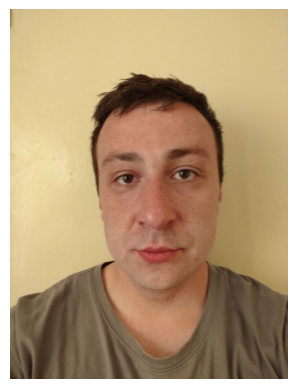

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/DZ66/me_without_mask.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')
plt.show;

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/gdrive/MyDrive/DZ66/me_without_mask.jpg'
img = image.load_img(img_path,target_size=(224, 224))
images = image.img_to_array(img)
images = np.expand_dims(images,axis=0)
prediction = model.predict(images)
if prediction == 0:
  print('Wit mask')
else:
  print('Without mask')

1/1 [==============================] - 0s 221ms/step
Without mask


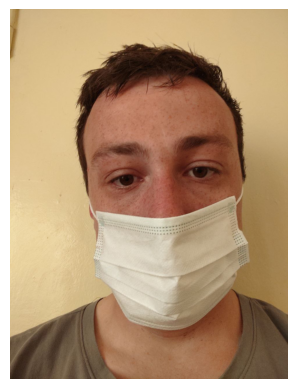

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/DZ66/me_with_mask.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis('off')
plt.show;

In [ ]:
img_path = '/content/gdrive/MyDrive/DZ66/me_with_mask.jpg'
img = image.load_img(img_path,target_size=(224, 224))
images = image.img_to_array(img)
images = np.expand_dims(images,axis=0)
prediction = model.predict(images)
if prediction == 0:
  print('With mask')
else:
  print('Without mask') 

1/1 [==============================] - 0s 181ms/step
Without mask
